### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Import data

In [2]:
dataset = pd.read_csv("Ads_CTR.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
dataset= pd.get_dummies(dataset)

In [4]:
dataset.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [5]:
X=dataset.iloc[:,[1,2,4]].values
Y=dataset.iloc[:,3].values

In [6]:
X

array([[   19, 19000,     0],
       [   35, 20000,     0],
       [   26, 43000,     1],
       ...,
       [   50, 20000,     1],
       [   36, 33000,     0],
       [   49, 36000,     1]])

### Spliting the dataset into Training set & Test set 

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [33]:
X_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

### Feature Scaling (to make the features on same scale)

In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [10]:
X_train

array([[ 0.58164944, -0.88670699,  0.98019606],
       [-0.60673761,  1.46173768, -1.02020406],
       [-0.01254409, -0.5677824 ,  0.98019606],
       [-0.60673761,  1.89663484,  0.98019606],
       [ 1.37390747, -1.40858358,  0.98019606],
       [ 1.47293972,  0.99784738,  0.98019606],
       [ 0.08648817, -0.79972756, -1.02020406],
       [-0.01254409, -0.24885782, -1.02020406],
       [-0.21060859, -0.5677824 ,  0.98019606],
       [-0.21060859, -0.19087153,  0.98019606],
       [-0.30964085, -1.29261101,  0.98019606],
       [-0.30964085, -0.5677824 , -1.02020406],
       [ 0.38358493,  0.09905991, -1.02020406],
       [ 0.8787462 , -0.59677555,  0.98019606],
       [ 2.06713324, -1.17663843,  0.98019606],
       [ 1.07681071, -0.13288524, -1.02020406],
       [ 0.68068169,  1.78066227,  0.98019606],
       [-0.70576986,  0.56295021,  0.98019606],
       [ 0.77971394,  0.35999821,  0.98019606],
       [ 0.8787462 , -0.53878926,  0.98019606],
       [-1.20093113, -1.58254245, -1.020

### Model Selection

In [11]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing, metrics
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

clfs = {'GradientBoosting': GradientBoostingClassifier(),
        'LogisticRegression' : LogisticRegression(),
        'GaussianNB': GaussianNB(),
        'RandomForest': RandomForestClassifier(),
        'SupportVectorMachine' : SVC(probability=True),
        'ExtraTreesClassifier' : ExtraTreesClassifier()
        }

Computing GradientBoosting
Computing LogisticRegression
Computing GaussianNB
Computing RandomForest
Computing SupportVectorMachine
Computing ExtraTreesClassifier


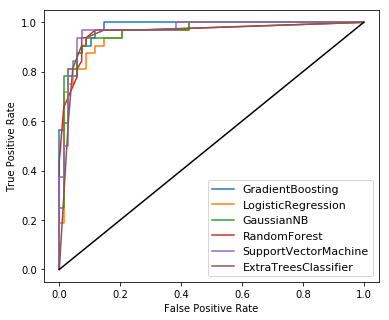

In [12]:
cols = ['model', 'roc_auc_score', 'accuracy','precision','recall','f1_score']
models_report = pd.DataFrame(columns = cols)
feature_importance = pd.DataFrame()

conf_matrix = dict()

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    Y_score = clf.predict_proba(X_test)[:, 1]

    print('Computing {}'.format(clf_name))
    
    if (clf_name == 'RandomForest') | (clf_name == 'GradientBoosting') | (clf_name == 'ExtraTreesClassifier') :
        tmp_fi = pd.Series(clf.feature_importances_)
        feature_importance[clf_name] = tmp_fi
        

    tmp = pd.Series({ 
                     'model': clf_name,
                     'roc_auc_score' : metrics.roc_auc_score(Y_test, Y_score),
                     'accuracy': metrics.accuracy_score(Y_test, Y_pred),
                     'precision': metrics.precision_score(Y_test, Y_pred),
                     'recall': metrics.recall_score(Y_test, Y_pred),
                     'f1_score': metrics.f1_score(Y_test, Y_pred)
                    })

    models_report = models_report.append(tmp, ignore_index = True)

    conf_matrix[clf_name] = pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)

    precision, recall, _ = metrics.precision_recall_curve(Y_test, Y_score)
    fpr, tpr, _ = metrics.roc_curve(Y_test, Y_score, drop_intermediate = False, pos_label = 1)

    plt.figure(1, figsize = (6,5))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(fpr, tpr, label = clf_name)
    plt.legend(prop={'size':11})
plt.plot([0,1], [0,1], c = 'black')
plt.show()

In [13]:
models_report

,model,roc_auc_score,accuracy,precision,recall,f1_score
0,GradientBoosting,0.974724,0.91,0.870968,0.84375,0.857143
1,LogisticRegression,0.954963,0.91,0.896552,0.81250,0.852459
2,GaussianNB,0.962776,0.91,0.925926,0.78125,0.847458
3,RandomForest,0.960018,0.90,0.843750,0.84375,0.843750
4,SupportVectorMachine,0.967831,0.93,0.878788,0.90625,0.892308
5,ExtraTreesClassifier,0.951746,0.92,0.852941,0.90625,0.878788


In [14]:
def plot_confusion_matrix(cm, ax, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes, rotation=35)

    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=35)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

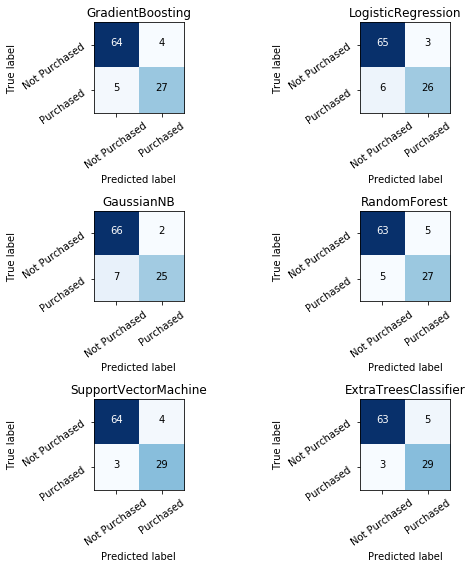

In [15]:
import matplotlib.gridspec as gridspec
import itertools 
fig = plt.figure(figsize=(8, 8)) 
gs = gridspec.GridSpec(3, 2)

ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[1,0])
ax4 = plt.subplot(gs[1,1])
ax5 = plt.subplot(gs[2,0])
ax6 = plt.subplot(gs[2,1])

for c, ax in zip(conf_matrix.keys(), [ax1,ax2,ax3,ax4,ax5,ax6]):
    plot_confusion_matrix(conf_matrix[c].values, ax, title = c, classes=['Not Purchased','Purchased'])

plt.tight_layout()
plt.show()

### Feature Selection

In [16]:
features= ['Age', 'EstimatedSalary', 'Gender_Female']

                 GradientBoosting  RandomForest  ExtraTreesClassifier
Age                      5.006513      4.701699              5.044116
EstimatedSalary          4.962377      5.221483              4.904310
Gender_Female            0.031111      0.076818              0.051574


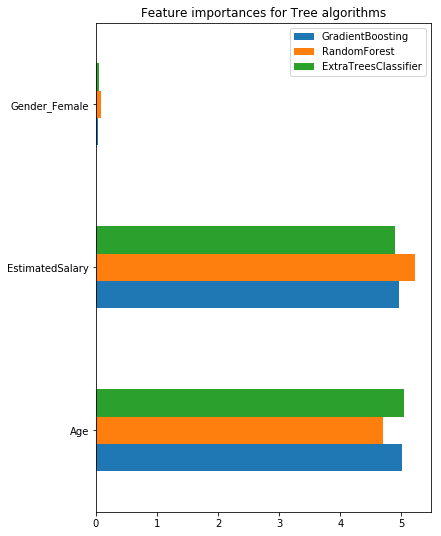

In [17]:
fi = feature_importance
fi.index = features
fi = fi.head(3) # Take the 3 most important metrics
fi = fi.sort_values('GradientBoosting', ascending=False)
fi = (fi / fi.sum(axis=0)) * 10
print(fi)
fi.plot.barh(title = 'Feature importances for Tree algorithms', figsize = (6,9))
plt.show()

### Model Fitting and Prediction

In [18]:
dataset.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [19]:
X=dataset.iloc[:,[1,2]].values   #Age & EstimatedSalary as dependent variable
Y=dataset.iloc[:,3].values

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score 

clf = GradientBoostingClassifier() # good roc auc
clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [23]:
#Applying K-fold Cross Validation to evaluate model performance
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf,X_train, Y_train, cv=10, scoring='accuracy')
print('The training accuracy scores for the iterations are {}'.format(cv_scores))
print('The training mean accuracy score is {}'.format(cv_scores.mean()))

The training accuracy scores for the iterations are [0.83870968 0.86666667 0.8        0.86666667 0.83333333 0.83333333
 0.9        0.9        0.96666667 0.96551724]
The training mean accuracy score is 0.8770893585465332


In [24]:
clf.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [25]:
Y_pred = clf.predict(X_test)

In [26]:
print("Accuracy : " + str(accuracy_score(Y_test, Y_pred)))
print("F1 Score : " + str(f1_score(Y_test, Y_pred)))
print("Confusion Matrix : \n" + str(confusion_matrix(Y_test, Y_pred)))

Accuracy : 0.91
F1 Score : 0.8571428571428571
Confusion Matrix : 
[[64  4]
 [ 5 27]]


In [27]:
Y_pred_proba = clf.predict_proba(X_test)[:, 1]
print("ROC AUC Score : " + str(roc_auc_score(Y_test, Y_pred_proba)))

ROC AUC Score : 0.9738051470588235


### Model Hyper-parameter Tuning and improving model performance

In [28]:
from sklearn.model_selection import GridSearchCV
grid_values = {'n_estimators':[50,100,200],'max_depth':[2,3,4],
               'min_samples_leaf':[1,40,60], 'min_samples_split':[2,3], 'learning_rate' : [0.05, 0.1, 0.2]}
grid_RF = GridSearchCV(clf,param_grid=grid_values,scoring='accuracy')
grid_RF.fit(X_train, Y_train)
grid_RF.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_samples_leaf': 40,
 'min_samples_split': 2,
 'n_estimators': 50}

In [29]:
clf = GradientBoostingClassifier(learning_rate = 0.05,max_depth= 3,min_samples_leaf = 40,n_estimators= 50, min_samples_split=2)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [30]:
print("Accuracy : " + str(accuracy_score(Y_test, Y_pred)))
print("F1 Score : " + str(f1_score(Y_test, Y_pred)))
print("Confusion Matrix : \n" + str(confusion_matrix(Y_test, Y_pred)))

Accuracy : 0.94
F1 Score : 0.9090909090909091
Confusion Matrix : 
[[64  4]
 [ 2 30]]


In [31]:
Y_pred_proba = clf.predict_proba(X_test)[:, 1]
print("ROC AUC Score : " + str(roc_auc_score(Y_test, Y_pred_proba)))

ROC AUC Score : 0.9758731617647058
